<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/sir_rec_disc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

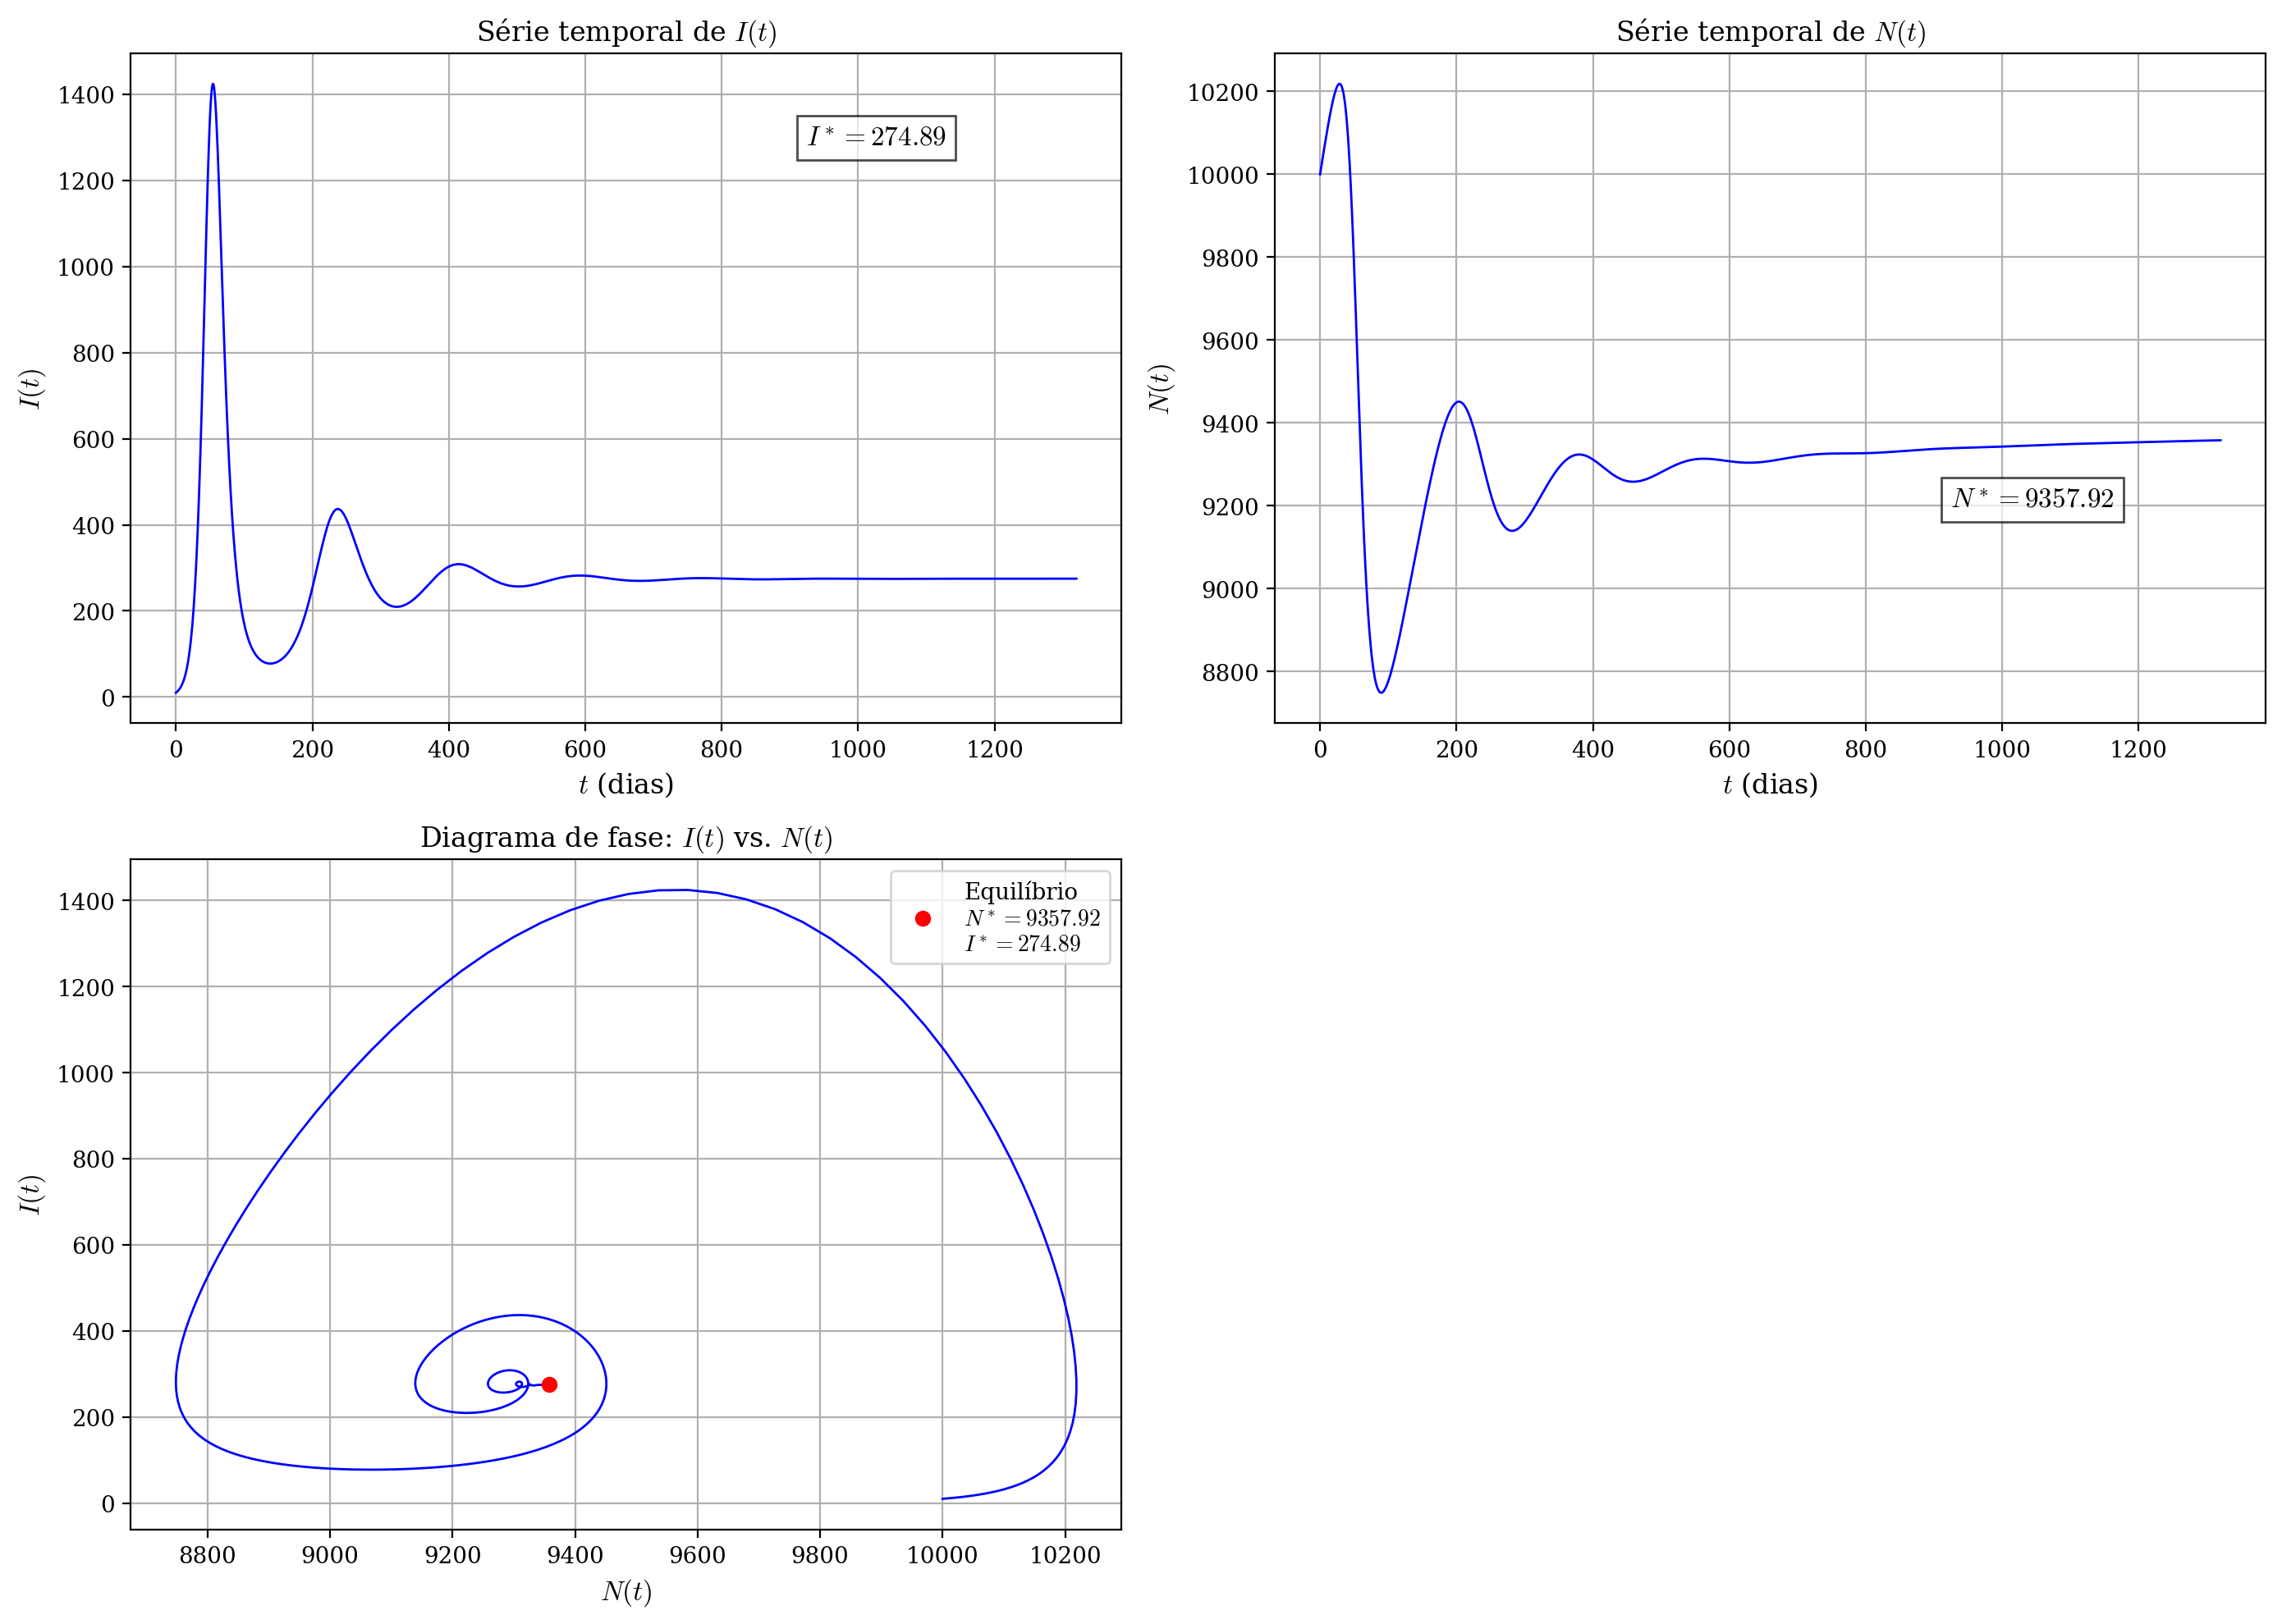

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Configuração do matplotlib
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('mathtext', fontset='cm')

# Modelo SIR discreto
def sir_disc(beta, gamma, nu, mu, alpha, Lambda, N0, I0, R0, T):
    passos = int(T) + 1
    S = np.zeros(passos)
    I = np.zeros(passos)
    R = np.zeros(passos)
    N = np.zeros(passos)
    t = np.arange(0, T+1)

    # Condições iniciais
    S[0] = max(0, N0 - I0 - R0)
    I[0] = I0
    R[0] = R0
    N[0] = S[0] + I[0] + R[0]

    max_threshold = 1e8

    for k in range(passos - 1):
        N[k] = S[k] + I[k] + R[k]
        if N[k] > max_threshold:
            S[k+1:] = np.nan
            I[k+1:] = np.nan
            R[k+1:] = np.nan
            N[k+1:] = np.nan
            break
        S[k+1] = S[k] + (Lambda + nu * N[k] - beta * S[k] * I[k] / N[k] - mu * S[k])
        I[k+1] = I[k] + (beta * S[k] * I[k] / N[k] - gamma * I[k] - (mu + alpha) * I[k])
        R[k+1] = R[k] + (gamma * I[k] - mu * R[k])
        N[k+1] = S[k+1] + I[k+1] + R[k+1]
    return t, S, I, R, N

# Função modificada mostrando valores de equilíbrio do último termo dos arrays
def plot_sir(beta, gamma, nu, mu, alpha, Lambda, N0, I0, R0, T):
    t, S, I, R, N = sir_disc(beta, gamma, nu, mu, alpha, Lambda, N0, I0, R0, T)

    N_eq = N[~np.isnan(N)][-1]
    I_eq = I[~np.isnan(I)][-1]

    plt.figure(figsize=(14, 10), dpi=200)

    # Gráfico de I(t)
    plt.subplot(2, 2, 1)
    plt.plot(t, I, color='blue', lw=1)
    plt.xlabel('$t$ (dias)', fontsize=12)
    plt.ylabel('$I(t)$', fontsize=12)
    plt.title('Série temporal de $I(t)$', fontsize=12)
    plt.grid(True)
    plt.text(0.7 * T, 0.9 * max(I), f'$I^* = {I_eq:.2f}$', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    # Gráfico de N(t)
    plt.subplot(2, 2, 2)
    plt.plot(t, N, color='blue', lw=1)
    plt.xlabel('$t$ (dias)', fontsize=12)
    plt.ylabel('$N(t)$', fontsize=12)
    plt.title('Série temporal de $N(t)$', fontsize=12)
    plt.grid(True)
    plt.text(0.7 * T, 0.9 * max(N), f'$N^* = {N_eq:.2f}$', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    # Diagrama de fase
    plt.subplot(2, 2, 3)
    plt.plot(N, I, color='blue', lw=1)
    plt.xlabel('$N(t)$', fontsize=12)
    plt.ylabel('$I(t)$', fontsize=12)
    plt.title('Diagrama de fase: $I(t)$ vs. $N(t)$', fontsize=12)
    plt.grid(True)
    plt.plot(N_eq, I_eq, 'ro', label=f'Equilíbrio\n$N^*={N_eq:.2f}$\n$I^*={I_eq:.2f}$')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Widgets para parâmetros
beta_slider = widgets.FloatSlider(min=0.01, max=1.5, step=0.001, value=0.3, description='beta', readout_format='.4f')
gamma_slider = widgets.FloatSlider(min=0.001, max=1.0, step=0.001, value=0.122, description='gamma', readout_format='.4f')
nu_slider = widgets.FloatSlider(min=0.0, max=0.1, step=0.0001, value=0.0082, description='nu', readout_format='.4f')
mu_slider = widgets.FloatSlider(min=0.0001, max=0.1, step=0.0001, value=0.0091, description='mu', readout_format='.4f')
alpha_slider = widgets.FloatSlider(min=0.001, max=0.1, step=0.0001, value=0.04200, description='alpha', readout_format='.4f')
Lambda_slider = widgets.FloatSlider(min=0, max=100, step=1, value=20, description='Lambda', readout_format='.1f')
N0_slider = widgets.IntSlider(min=100, max=100000, step=10, value=10000, description='N0', readout_format='d')
I0_slider = widgets.IntSlider(min=0, max=500, step=1, value=10, description='I0', readout_format='d')
R0_slider = widgets.IntSlider(min=0, max=500, step=1, value=0, description='R0', readout_format='d')
T_slider = widgets.IntSlider(min=50, max=5*365, step=10, value=800, description='T (dias)', readout_format='d')

# Interface interativa com mapeamento correto
ui = widgets.VBox([
    beta_slider, gamma_slider, nu_slider, mu_slider, alpha_slider, Lambda_slider,
    N0_slider, I0_slider, R0_slider, T_slider
])

out = widgets.interactive_output(plot_sir, {
    'beta': beta_slider,
    'gamma': gamma_slider,
    'nu': nu_slider,
    'mu': mu_slider,
    'alpha': alpha_slider,
    'Lambda': Lambda_slider,
    'N0': N0_slider,
    'I0': I0_slider,
    'R0': R0_slider,
    'T': T_slider
})

display(ui, out)
